In [1]:
#Importing libraries

import pandas as pd
import numpy as np

from scipy import stats
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The sales price is the target variable. Hence, analysing the sales price might give a good insight.

In [4]:
sales_price = train_data['SalePrice']

In [5]:
sales_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
corr = train_data.corr()

In [8]:
import seaborn as sns

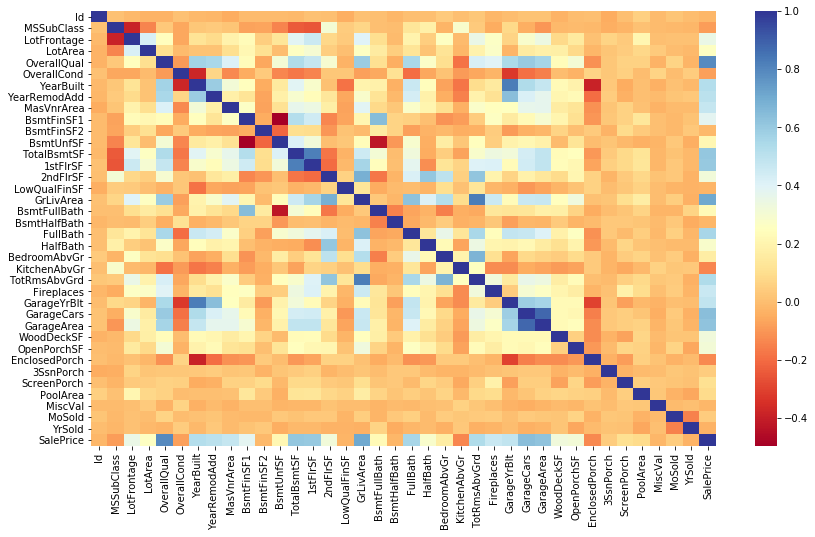

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(corr,cmap = 'RdYlBu')

# Variable Categorization

In [10]:
# Create the categories
outsidesurr_df = train_data[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

building_df = train_data[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

utilities_df = train_data[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

ratings_df = train_data[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

rooms_df = train_data[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]

In [11]:
#set Id as index
outsidesurr_df.set_index('Id')
building_df.set_index('Id')
utilities_df.set_index('Id')
ratings_df.set_index('Id')
rooms_df.set_index('Id')

#set Salesprice as 1st column
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'Saleprice', value=sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'Saleprice', value=sp0)

sp2 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'Saleprice', value=sp0)

sp3 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'Saleprice', value=sp0)

C:\Users\Gayathry\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Data Visualisation

Text(0, 0.5, 'Number of houses')

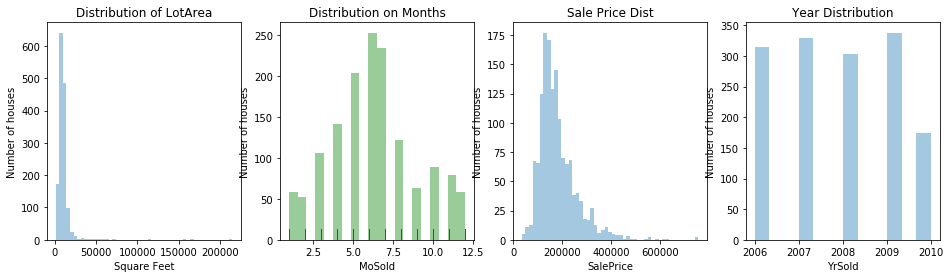

In [12]:
f, axes = plt.subplots(ncols=4,figsize=(16,4))

sns.distplot(train_data['LotArea'],kde=False,ax=axes[0]).set_title('Distribution of LotArea')
axes[0].set_ylabel('Number of houses')
axes[0].set_xlabel('Square Feet')
axes[0].set_xlim = ((10000,20000))

sns.distplot(train_data['MoSold'],bins=20,kde=False,ax=axes[1],color='green',rug=True).set_title('Distribution on Months')
axes[1].set_ylabel('Number of houses')
axes[1].set_xlim = ((1,20))

sns.distplot(train_data['SalePrice'],ax=axes[2],kde=False).set_title('Sale Price Dist')
axes[2].set_ylabel('Number of houses')

sns.distplot(train_data['YrSold'],ax=axes[3],kde=False).set_title('Year Distribution')
axes[3].set_ylabel('Number of houses')

Sales price is Right skwewd it seems

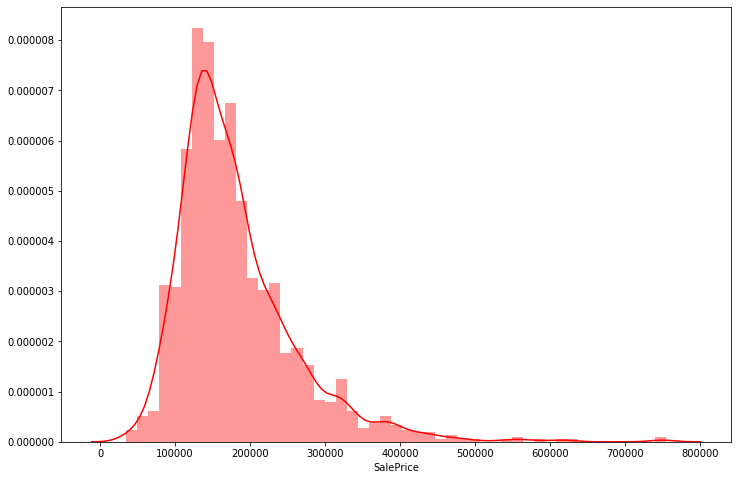

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(train_data['SalePrice'],color='red')
plt.show()

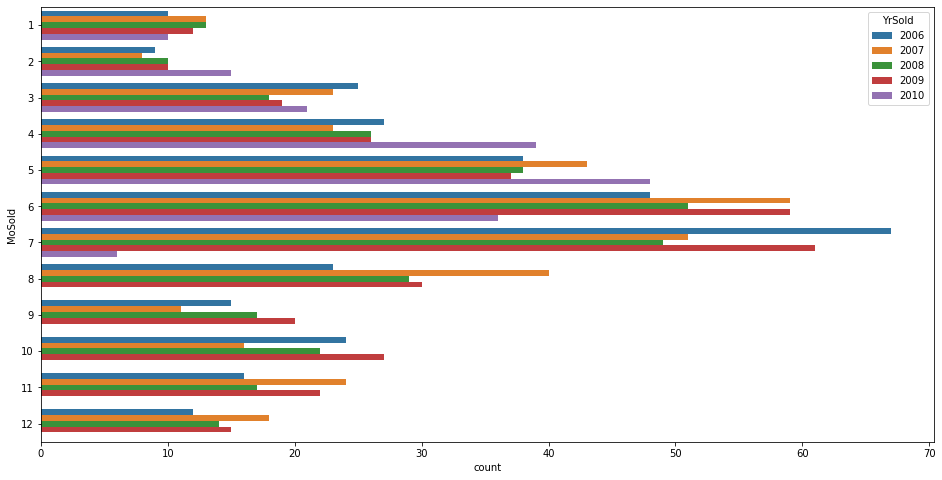

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(y='MoSold',hue='YrSold',data=train_data,orient='v')

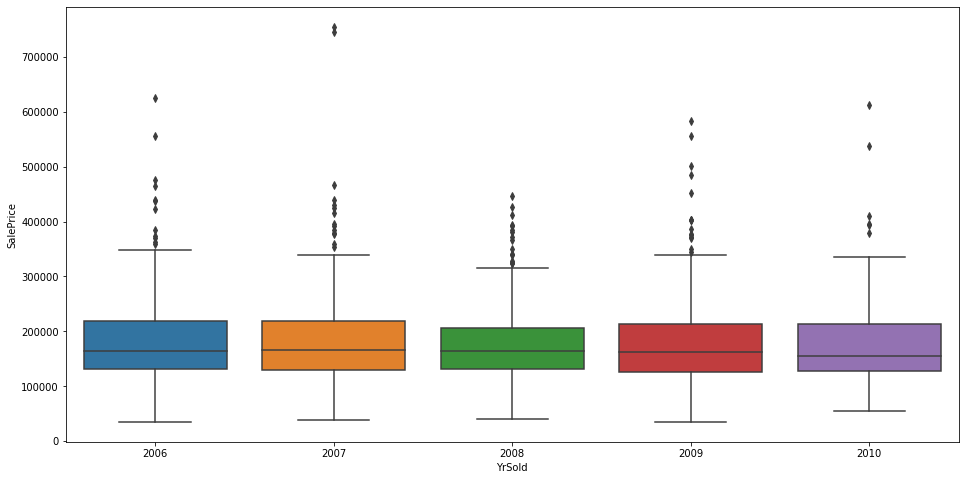

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x='YrSold',y='SalePrice',data=train_data)

<Figure size 7200x3600 with 0 Axes>

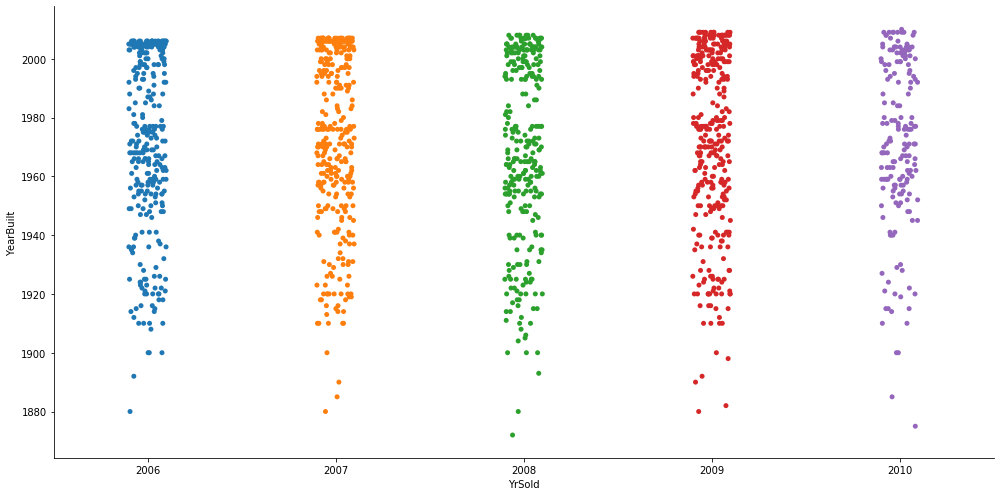

In [16]:
plt.figure(figsize=(100,50))
sns.catplot('YrSold','YearBuilt',data=train_data,jitter=True,height=7,aspect=2)

# Outside Features Correlation

In [17]:
outsidesurr_df = outsidesurr_df.set_index('Id')
outsidesurr_df.head()
corr_outside = outsidesurr_df.corr()
corr_outside

,Saleprice,LotFrontage,LotArea,MoSold,YrSold
Saleprice,1.000000,0.351799,0.263843,0.046432,-0.028923
LotFrontage,0.351799,1.000000,0.426095,0.011200,0.007450
LotArea,0.263843,0.426095,1.000000,0.001205,-0.014261
MoSold,0.046432,0.011200,0.001205,1.000000,-0.145721
YrSold,-0.028923,0.007450,-0.014261,-0.145721,1.000000


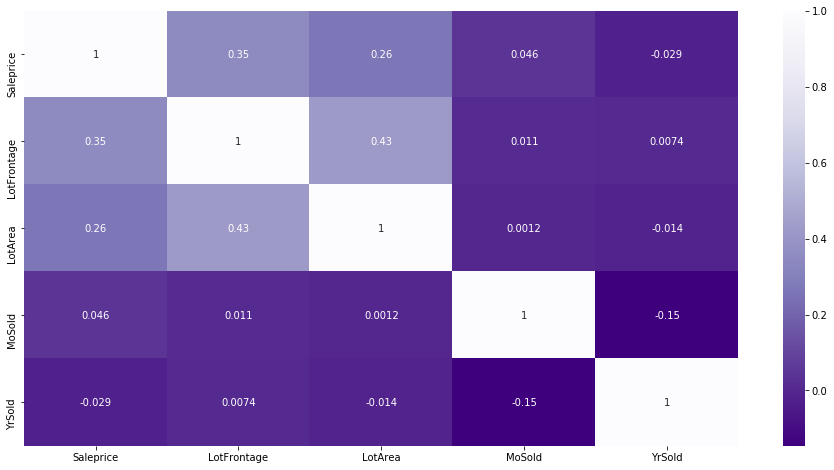

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_outside,cmap='Purples_r',annot=True)

from the correlation graph we can omit the values with less correlation with salesprice.

In [19]:
outsidesurr_df.head()

,Saleprice,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,PavedDrive,Street,Alley,LandContour,LandSlope,LotConfig,MoSold,YrSold,SaleType,LotShape,SaleCondition
Id,,,,,,,,,,,,,,,,,,
1,208500,RL,65.0,8450,CollgCr,Norm,Norm,Y,Pave,NaN,Lvl,Gtl,Inside,2,2008,WD,Reg,Normal
2,181500,RL,80.0,9600,Veenker,Feedr,Norm,Y,Pave,NaN,Lvl,Gtl,FR2,5,2007,WD,Reg,Normal
3,223500,RL,68.0,11250,CollgCr,Norm,Norm,Y,Pave,NaN,Lvl,Gtl,Inside,9,2008,WD,IR1,Normal
4,140000,RL,60.0,9550,Crawfor,Norm,Norm,Y,Pave,NaN,Lvl,Gtl,Corner,2,2006,WD,IR1,Abnorml
5,250000,RL,84.0,14260,NoRidge,Norm,Norm,Y,Pave,NaN,Lvl,Gtl,FR2,12,2008,WD,IR1,Normal


# based on zones


In [20]:
zoning_value = outsidesurr_df.groupby(by=['MSZoning'],as_index=False)['Saleprice'].sum()
zoning = zoning_value['MSZoning'].tolist()
total_saleprice = zoning_value['Saleprice'].tolist()

In [21]:
labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']

In [22]:
explode = [0,0.1,0.1,0.1,0]

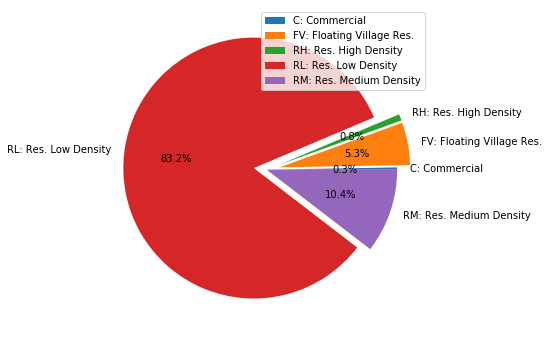

In [23]:
fig1,ax1 = plt.subplots(figsize=(12,6))
ax1.pie(x=total_saleprice,labels=labels,explode=explode,autopct='%.1f%%')
plt.legend(loc='best')
plt.show()

# based on years per zone

In [24]:
zone_year_value = train_data.groupby(['YrSold','MSZoning'])['SalePrice'].count()

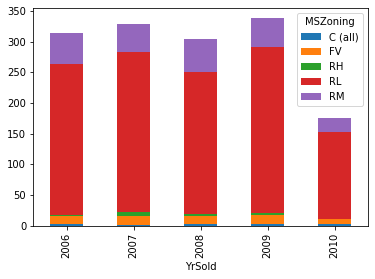

In [25]:
zone_year_value.unstack().plot(kind='bar',stacked=True)

# no. of houses sold per neighbours

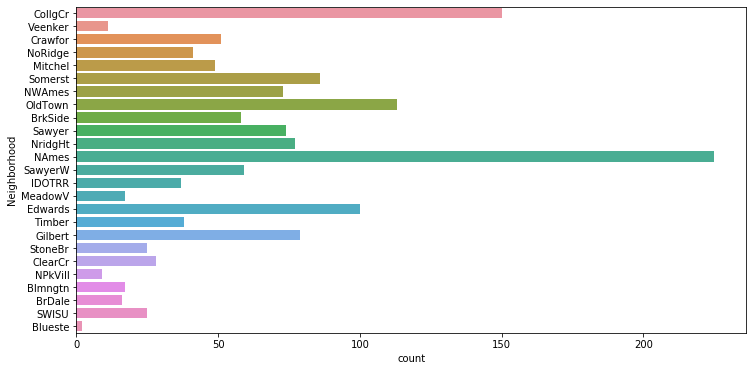

In [26]:
fig2,ax2 = plt.subplots(figsize=(12,6))
sns.countplot(y='Neighborhood',data=train_data)

# Neigborhood vs Saleprice

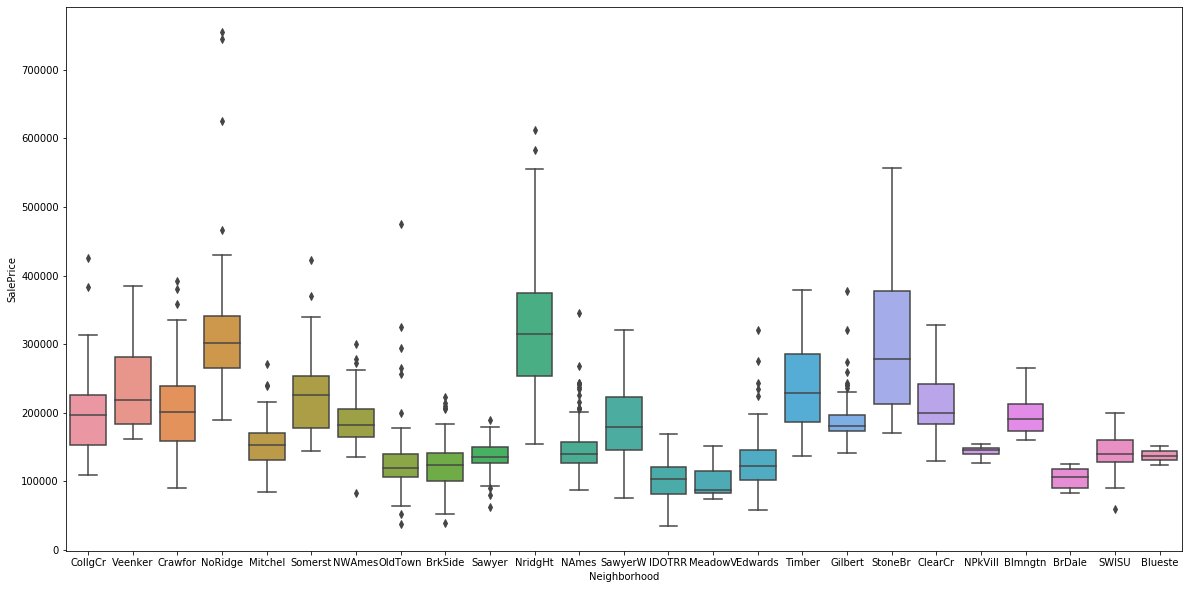

In [27]:
fig3, ax3 = plt.subplots(figsize=(20,10))
sns.boxplot(x='Neighborhood',y='SalePrice',data=train_data)

# Size vs Price

In [28]:
train_data.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

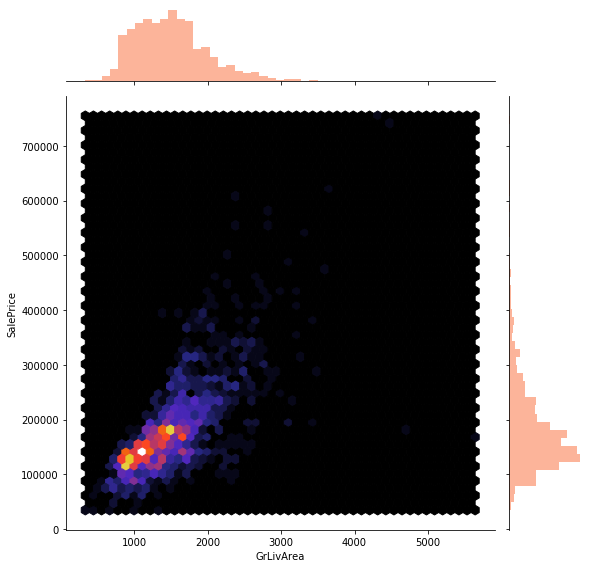

In [29]:
sns.jointplot('GrLivArea','SalePrice',data=train_data,cmap='CMRmap',color='#F84403',kind='hex',height=8)

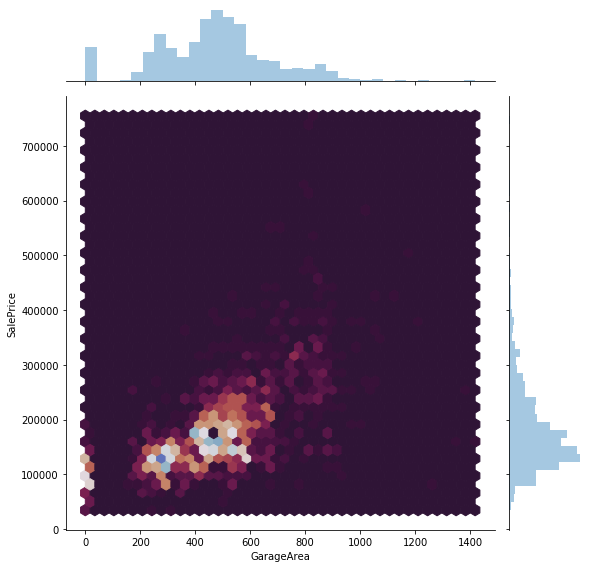

In [30]:
sns.jointplot('GarageArea','SalePrice',data=train_data,kind='hex',height=8,cmap='twilight_shifted_r')

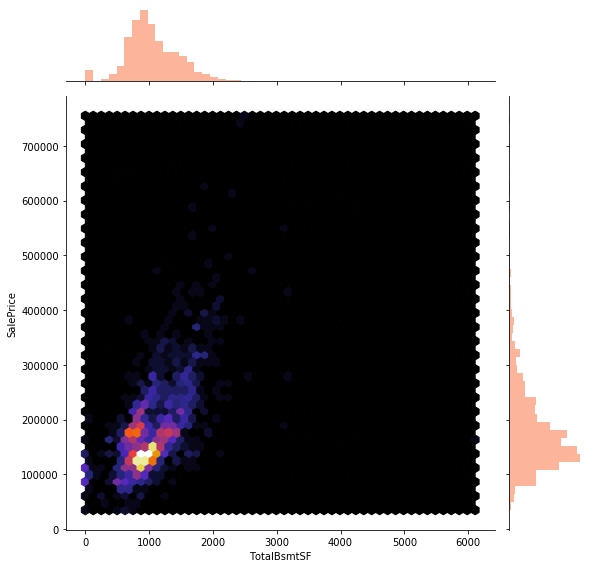

In [31]:
sns.jointplot('TotalBsmtSF','SalePrice',data=train_data,kind='hex',color='#F84403',cmap='CMRmap',height=8)

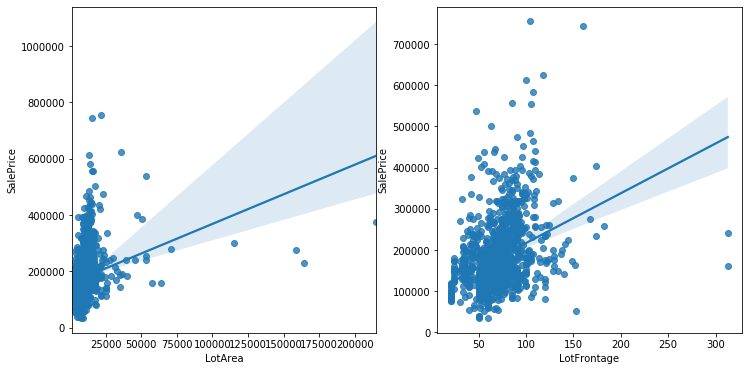

In [32]:
fig4, ax4 = plt.subplots(ncols=2,figsize=(12,6))

sns.regplot('LotArea','SalePrice',data=train_data,ax=ax4[0])
sns.regplot('LotFrontage','SalePrice',data=train_data)

# Building Characteristics

In [33]:
building_df.head()

,Saleprice,Id,MSSubClass,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition
0,208500,1,60,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,...,Typ,Attchd,2003.0,RFn,2,548,2,2008,WD,Normal
1,181500,2,20,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,...,Typ,Attchd,1976.0,RFn,2,460,5,2007,WD,Normal
2,223500,3,60,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,...,Typ,Attchd,2001.0,RFn,2,608,9,2008,WD,Normal
3,140000,4,70,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,...,Typ,Detchd,1998.0,Unf,3,642,2,2006,WD,Abnorml
4,250000,5,60,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,...,Typ,Attchd,2000.0,RFn,3,836,12,2008,WD,Normal


In [34]:
corr1 = building_df.corr()

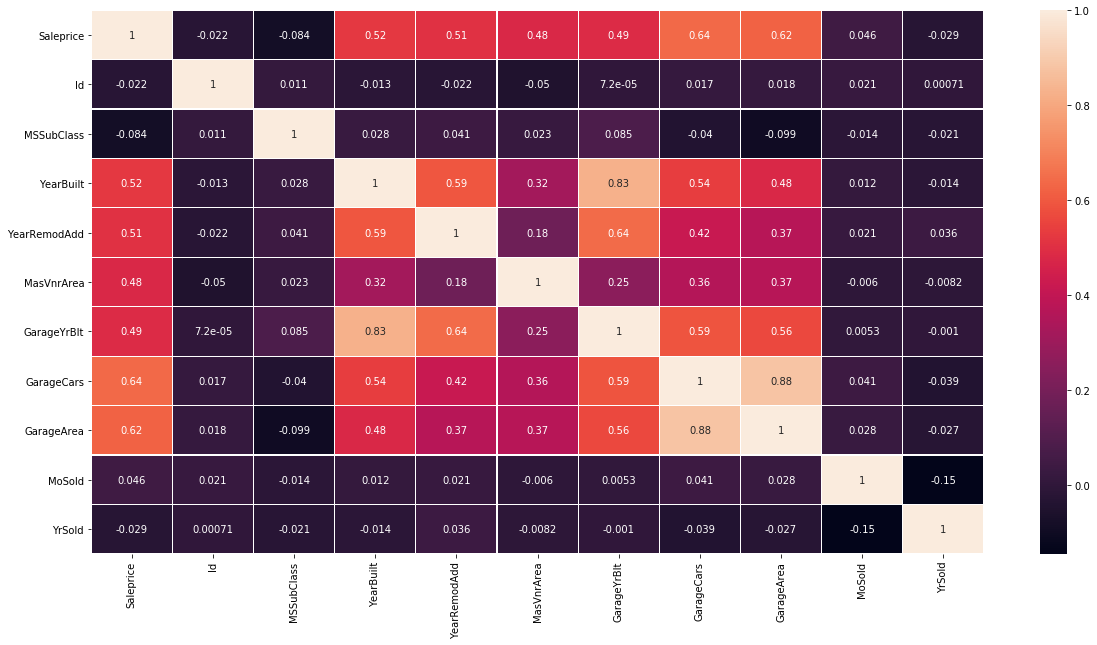

In [35]:
sns.heatmap(corr1,linewidths=0.2,annot=True)
fig = plt.gcf()
fig.set_size_inches(20,10)

In [36]:
#Creating a column for price range

train_data['Price_Range'] = np.nan
lst = [train_data]

for column in lst:
    column.loc[column['SalePrice']<150000,'Price_Range']='Low'
    column.loc[(column['SalePrice']>=150000) & (column['SalePrice']<300000),'Price_Range']= 'Medium'
    column.loc[column['SalePrice']>300000,'Price_Range']= 'High'

In [37]:
train_data['Price_Range'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

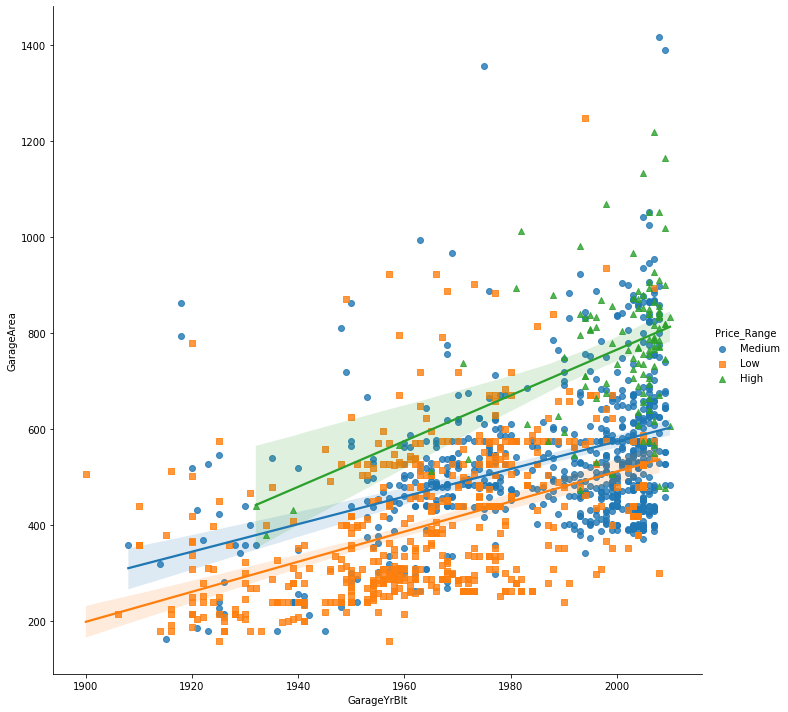

In [38]:
sns.lmplot('GarageYrBlt','GarageArea',hue='Price_Range',data=train_data,height=10,markers=["o", "s", "^"])

# Miscellaneous and Utilities

Text(0, 0.5, 'Number of streets')

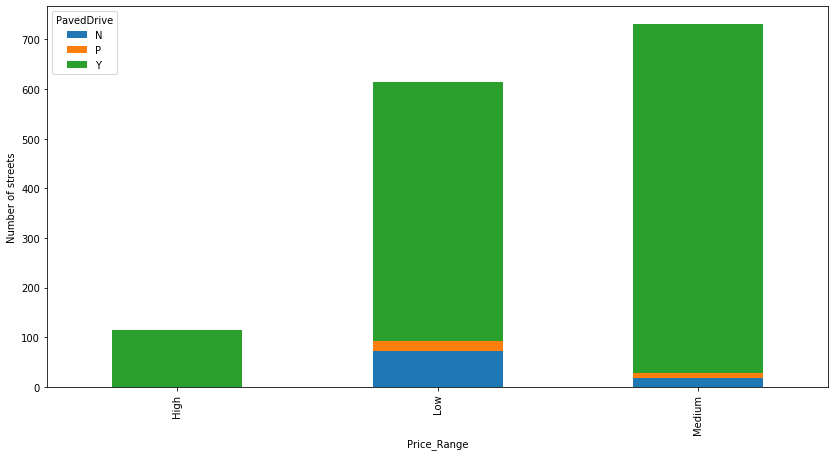

In [39]:
types_foundations = train_data.groupby(['Price_Range', 'PavedDrive']).size()
types_foundations.unstack().plot(kind='bar',stacked=True,figsize=(14,7))
plt.ylabel('Number of streets')

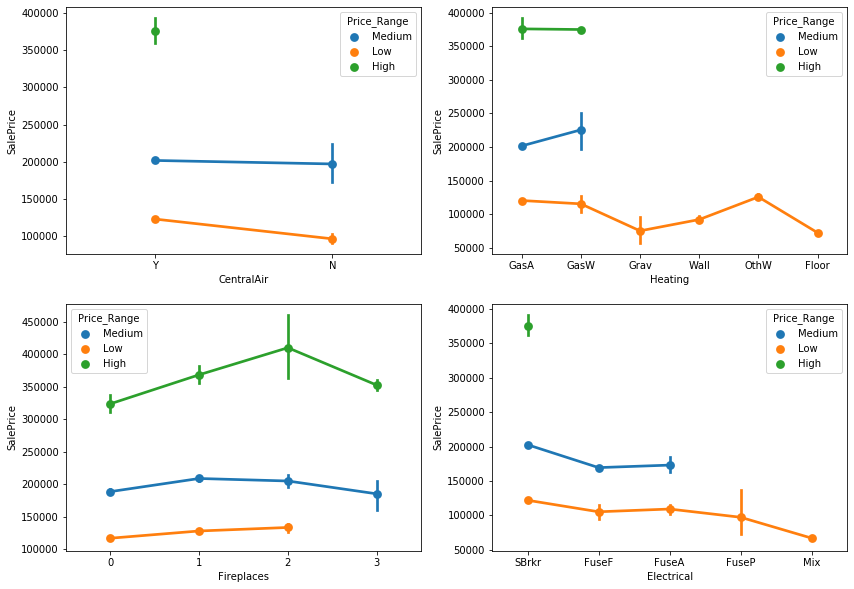

In [40]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

sns.pointplot(x= 'CentralAir',y='SalePrice', data=train_data,hue='Price_Range',ax=ax1)
sns.pointplot(x= 'Heating', y='SalePrice',data=train_data,hue='Price_Range',ax=ax2)
sns.pointplot(x= 'Fireplaces', y='SalePrice',data=train_data,hue='Price_Range',ax=ax3)
sns.pointplot(x= 'Electrical', y='SalePrice',data=train_data,hue='Price_Range',ax=ax4)

In [41]:
train_data.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

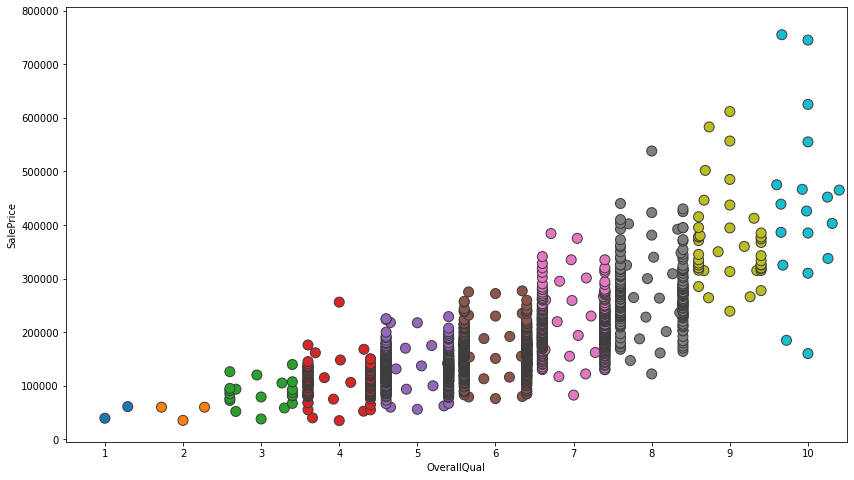

In [42]:
sns.swarmplot(x='OverallQual',y='SalePrice',data=train_data,size=10,linewidth=1)
figs = plt.gcf()
figs.set_size_inches(14,8)

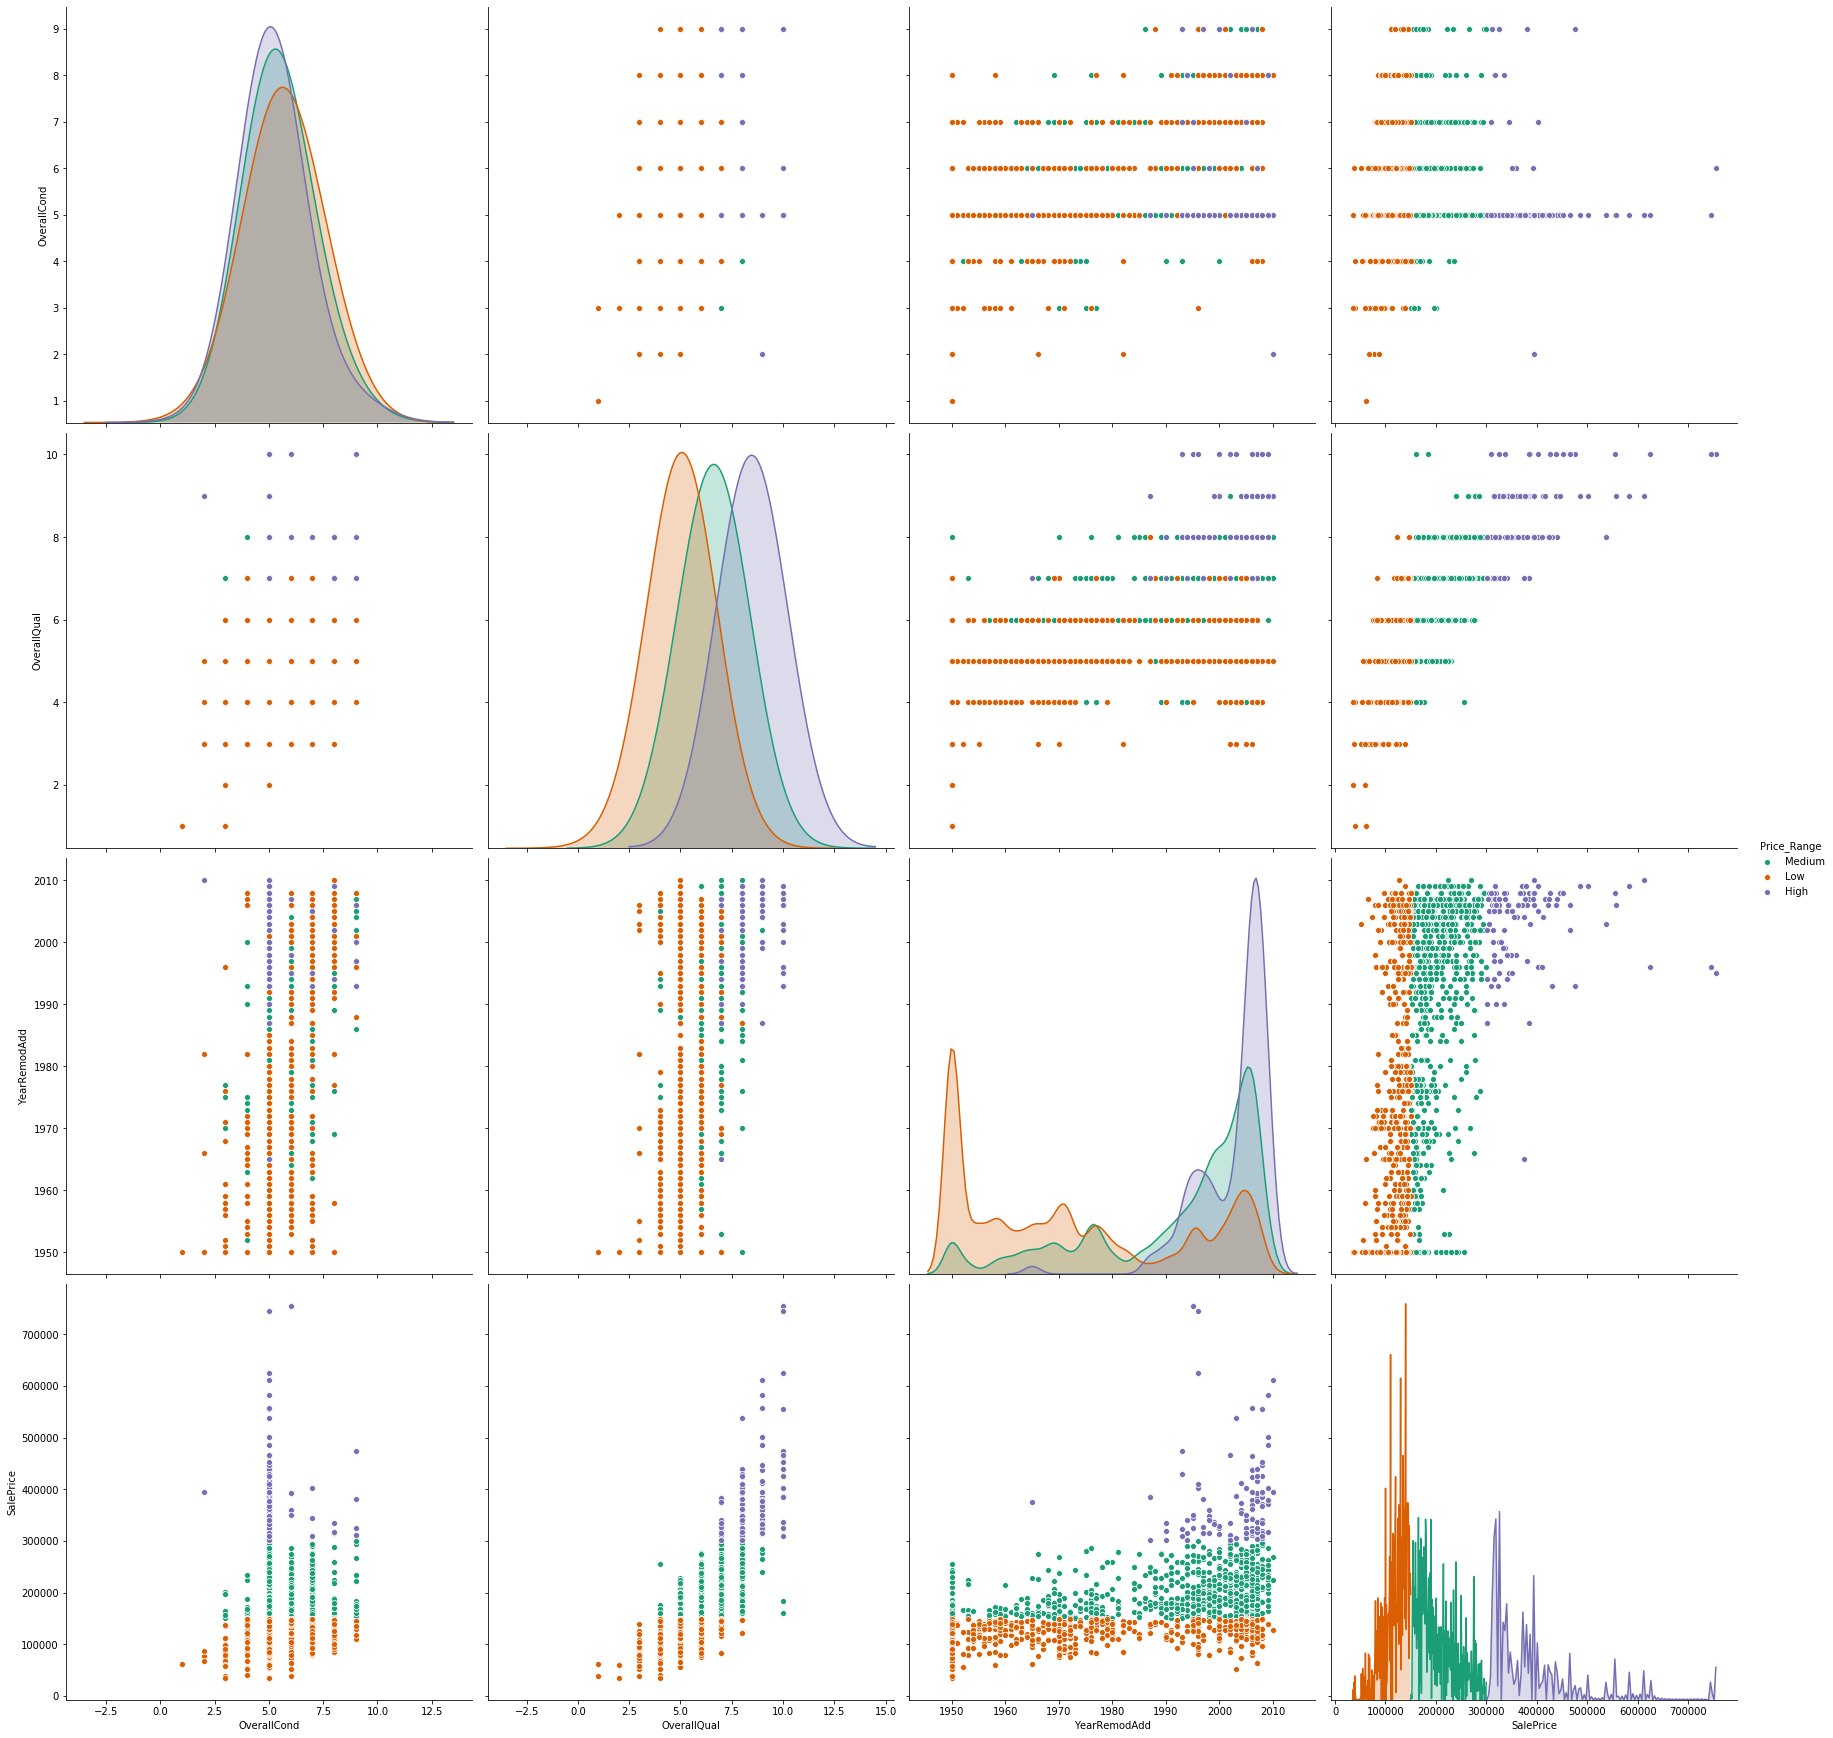

In [43]:
sns.pairplot(train_data, vars=["OverallCond", "OverallQual", "YearRemodAdd", "SalePrice"],
                hue="Price_Range",palette="Dark2", height=6,diag_kws={'bw':1.5})

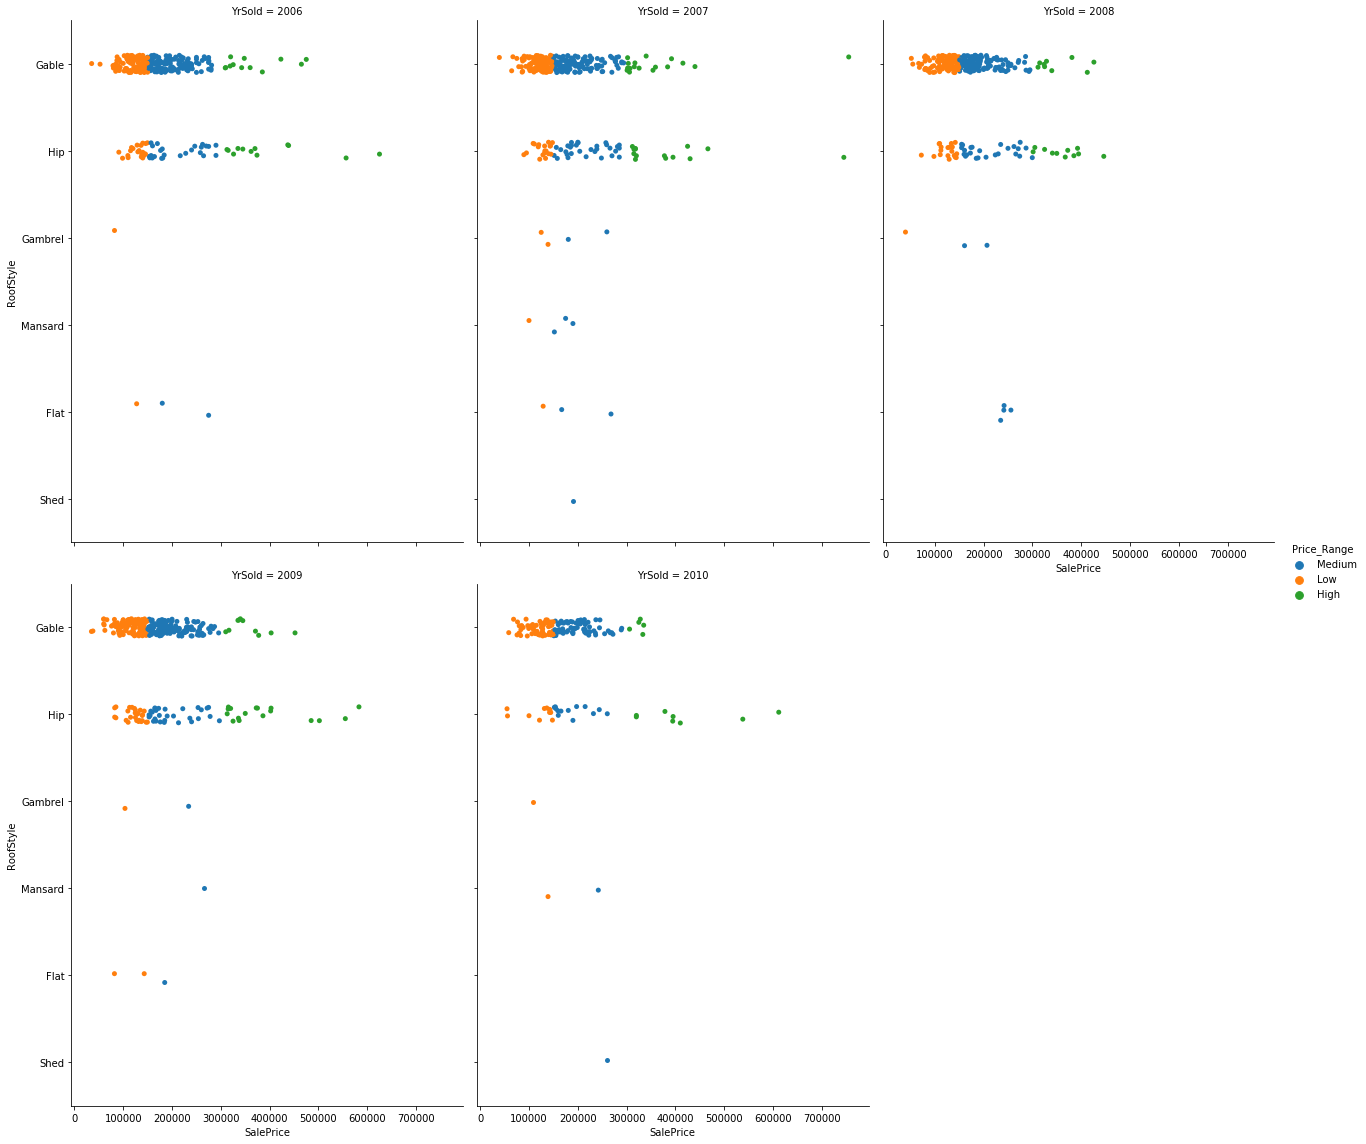

In [44]:
sns.catplot('SalePrice','RoofStyle',hue='Price_Range',col='YrSold',data=train_data,height=8,aspect=.75,col_wrap=3)

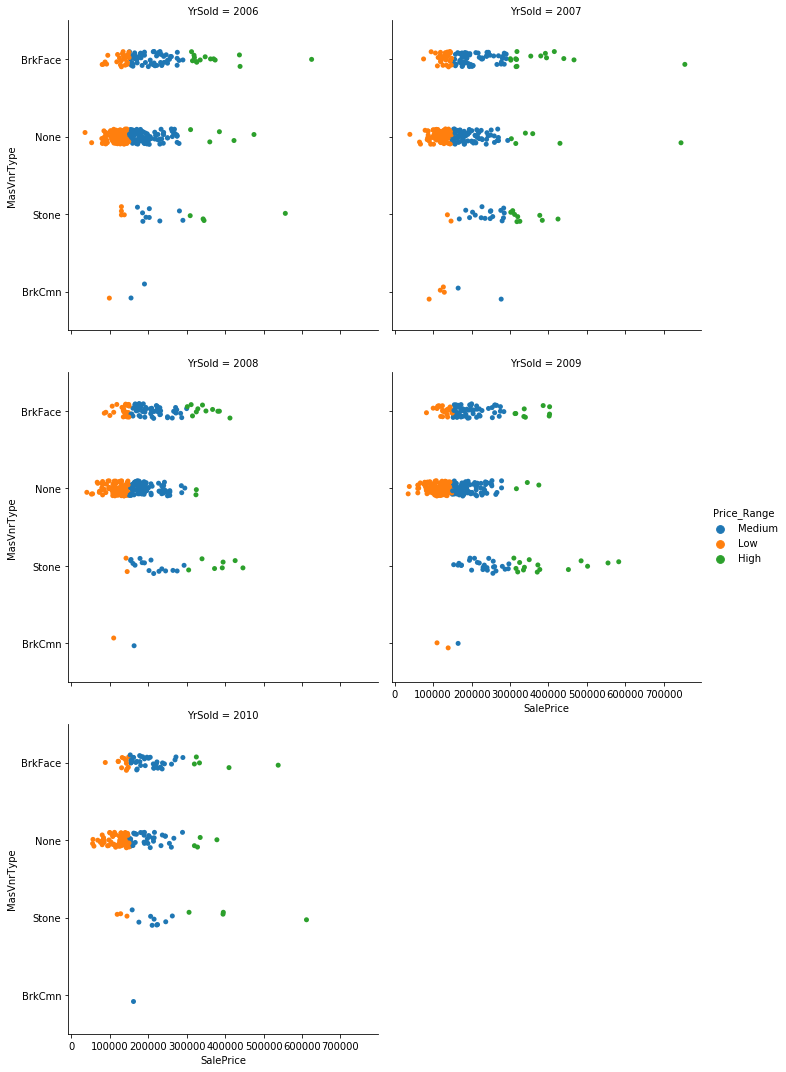

In [45]:
sns.catplot('SalePrice','MasVnrType',col='YrSold',col_wrap=2,data=train_data,hue='Price_Range')

# Quality of Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

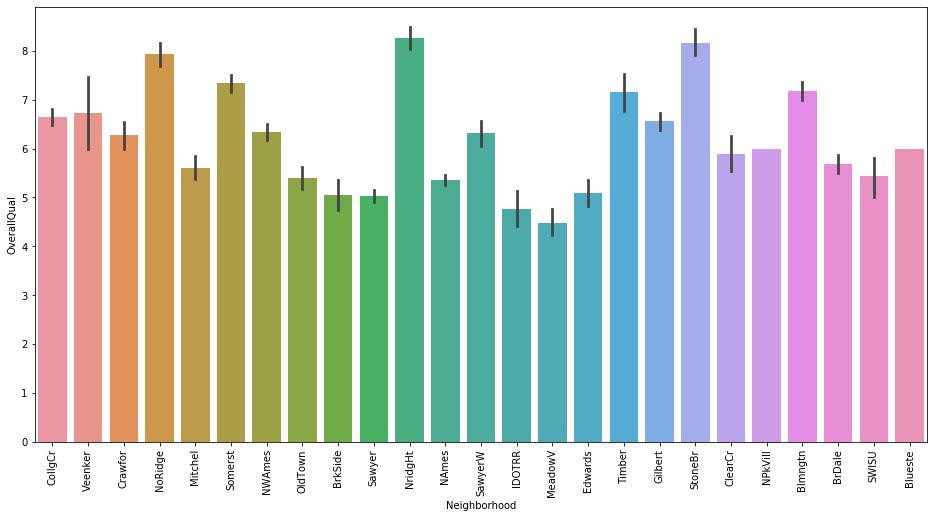

In [46]:
sns.barplot('Neighborhood','OverallQual',data=train_data)
t = plt.gcf()
t.set_figheight(8)
t.set_figwidth(16)
plt.xticks(rotation=90)

In [47]:
types_foundations = train_data.groupby(['Neighborhood','OverallQual']).size()

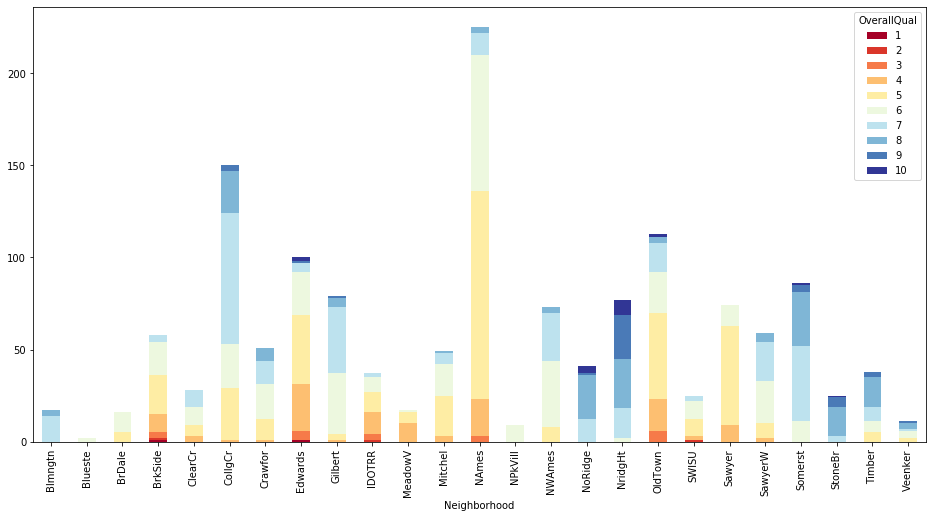

In [48]:
types_foundations.unstack().plot(kind='bar',stacked=True,colormap='RdYlBu',figsize=(16,8))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

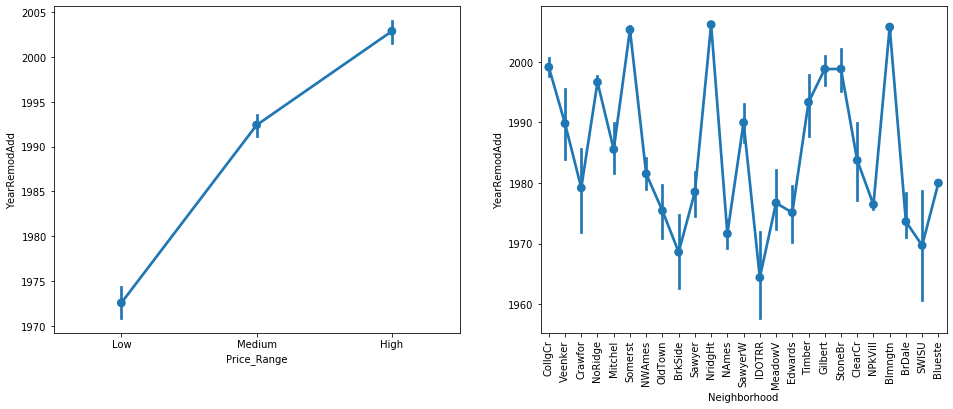

In [49]:
fig5,ax5 = plt.subplots(ncols=2,figsize=(16,6))

# Year remodeled vs Price Range
sns.pointplot(kind='point',x='Price_Range',y='YearRemodAdd',data=train_data,order=['Low','Medium','High'],ax=ax5[0])

sns.pointplot(x='Neighborhood',y='YearRemodAdd',data=train_data)
plt.xticks(rotation=90)

In [50]:
train_data.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Normalising the values

In [51]:
numeric_data = train_data.dtypes[train_data.dtypes != 'object'].index

In [52]:
import scipy
from scipy.stats import skew
skewed_Features = train_data[numeric_data].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)

In [53]:
high_skewed = DataFrame(skewed_Features,columns=['Skewness'])

In [54]:
high_skewed.head()

,Skewness
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080


In [55]:
from scipy.stats import norm

In [56]:
log_values = np.log(train_data['SalePrice'])

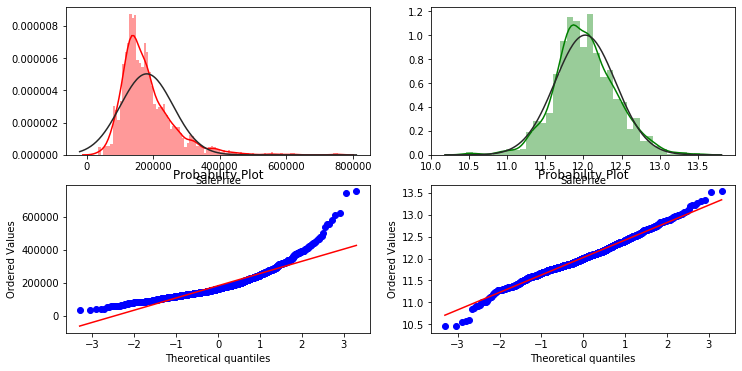

In [57]:
f1,((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(12,6))

sns.distplot(train_data['SalePrice'],ax = ax1,fit=norm,bins=100,color='red')
sns.distplot(log_values,fit=norm,color='green',ax=ax2)

ax3 = scipy.stats.probplot(train_data['SalePrice'],plot=ax3)
ax4 = scipy.stats.probplot(log_values,plot=ax4)

plt.show()

# Outlier Analysis

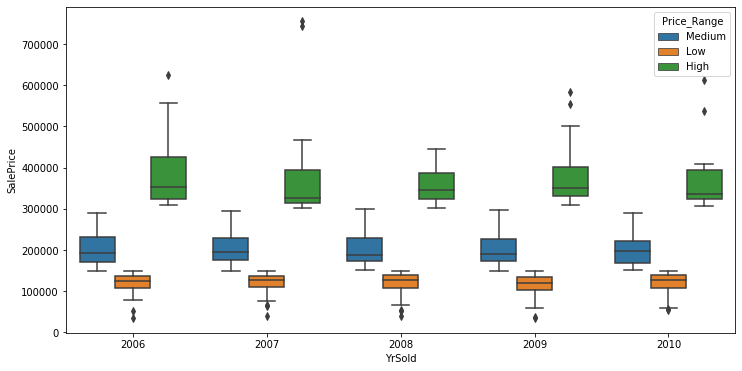

In [58]:
sns.boxplot(x='YrSold',y='SalePrice',hue='Price_Range',data=train_data)
t = plt.gcf()
t.set_size_inches(12,6)

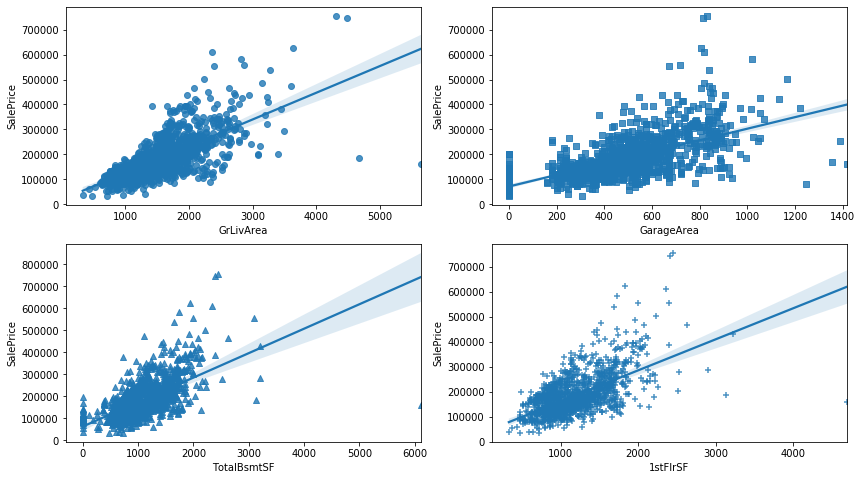

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,8))
var1 = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var1]], axis=1)
sns.regplot(x=var1, y='SalePrice', data=data, fit_reg=True, ax=ax1)


var2 = 'GarageArea'
data = pd.concat([train_data['SalePrice'], train_data[var2]], axis=1)
sns.regplot(x=var2, y='SalePrice', data=data, fit_reg=True, ax=ax2, marker='s')

var3 = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var3]], axis=1)
sns.regplot(x=var3, y='SalePrice', data=data, fit_reg=True, ax=ax3, marker='^')

var4 = '1stFlrSF'
data = pd.concat([train_data['SalePrice'], train_data[var4]], axis=1)
sns.regplot(x=var4, y='SalePrice', data=data, fit_reg=True, ax=ax4, marker='+')

plt.show()
train_data.columns.unique()

# Feature Engineering

In [60]:
train_data.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
train_data1 = train_data.copy()
test_data1 = test_data.copy()

train_data1.shape

(1460, 82)

In [62]:
train_data1.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
y_train = train_data1['SalePrice'].values
# We will concatenate but we will split further on.
#rtrain = train_data1.shape[0]
#ntest = test_data1.shape[0]
train_data1.drop(['SalePrice', 'Price_Range', 'Id'], axis=1, inplace=True)
test_data1.drop('Id', axis=1, inplace=True)
train_data1.shape

(1460, 79)

In [64]:
test_data1.shape

(1459, 79)

In [65]:
complete_data = pd.concat([train_data1, test_data1])
complete_data.shape


(2919, 79)

In [66]:
total_nas = complete_data.isnull().sum().sort_values(ascending=False)
percent_missing = (complete_data.isnull().sum()/complete_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_nas, percent_missing], axis=1, keys=['Total_M', 'Percentage'])

In [67]:
complete_data["PoolQC"] = complete_data["PoolQC"].fillna("None")
complete_data["MiscFeature"] = complete_data["MiscFeature"].fillna("None")
complete_data["Alley"] = complete_data["Alley"].fillna("None")
complete_data["Fence"] = complete_data["Fence"].fillna("None")
complete_data["FireplaceQu"] = complete_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    complete_data[col] = complete_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    complete_data[col] = complete_data[col].fillna('None')
complete_data['MSZoning'] = complete_data['MSZoning'].fillna(complete_data['MSZoning'].mode()[0])
complete_data["MasVnrType"] = complete_data["MasVnrType"].fillna("None")
complete_data["Functional"] = complete_data["Functional"].fillna("Typ")
complete_data['Electrical'] = complete_data['Electrical'].fillna(complete_data['Electrical'].mode()[0])
complete_data['KitchenQual'] = complete_data['KitchenQual'].fillna(complete_data['KitchenQual'].mode()[0])
complete_data['Exterior1st'] = complete_data['Exterior1st'].fillna(complete_data['Exterior1st'].mode()[0])
complete_data['Exterior2nd'] = complete_data['Exterior2nd'].fillna(complete_data['Exterior2nd'].mode()[0])
complete_data['SaleType'] = complete_data['SaleType'].fillna(complete_data['SaleType'].mode()[0])
complete_data['MSSubClass'] = complete_data['MSSubClass'].fillna("None")

In [68]:
complete_data["LotFrontage"] = complete_data.groupby("Neighborhood")["LotFrontage"].transform (lambda x: x.fillna(x.median()))

In [69]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    complete_data[col] = complete_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    complete_data[col] = complete_data[col].fillna(0)
    
complete_data["MasVnrArea"] = complete_data["MasVnrArea"].fillna(0)

In [70]:
complete_data = complete_data.drop(['Utilities'], axis=1)

In [71]:
#Combining attributes
complete_data['TotalSF'] = complete_data['TotalBsmtSF'] + complete_data['1stFlrSF'] + complete_data['2ndFlrSF']

In [72]:
#Splitting Numerical and Categorical variables
categorical = complete_data.select_dtypes(['object'])
numerical = complete_data.select_dtypes(exclude=['object'])

In [73]:
categorical

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,None,None,None,None,Y,None,None,None,WD,Normal
1455,RM,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,CarPort,Unf,TA,TA,Y,None,None,None,WD,Abnorml
1456,RL,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
1457,RL,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,None,None,None,None,Y,None,MnPrv,Shed,WD,Normal


In [74]:
for item in categorical.columns:
    x = categorical[item].unique()
    print(f' For {item} the values are :')
    print(x)
    print (f'{len(x)} items')
    print('\n')

 For MSZoning the values are :
['RL' 'RM' 'C (all)' 'FV' 'RH']
5 items


 For Street the values are :
['Pave' 'Grvl']
2 items


 For Alley the values are :
['None' 'Grvl' 'Pave']
3 items


 For LotShape the values are :
['Reg' 'IR1' 'IR2' 'IR3']
4 items


 For LandContour the values are :
['Lvl' 'Bnk' 'Low' 'HLS']
4 items


 For LotConfig the values are :
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
5 items


 For LandSlope the values are :
['Gtl' 'Mod' 'Sev']
3 items


 For Neighborhood the values are :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
25 items


 For Condition1 the values are :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
9 items


 For Condition2 the values are :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
8 items


 For BldgType the val

In [75]:
# By doing label encoding
def LabelEncode(item):
    categorical[item] = categorical.loc[item].astype('category')
    categorical[item] = categorical.loc[item].cat.codes
    return categorical[item]

In [76]:
for item in categorical.columns:
    categorical.loc[:,item] = categorical.loc[:,item].astype('category')
    categorical.loc[:,item] = categorical.loc[:,item].cat.codes

C:\Users\Gayathry\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Gayathry\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [77]:
train1_num = numerical.head(1460)
test1_num = numerical.tail(1459)
train2_num = categorical.head(1460)
test2_num = categorical.tail(1459)

In [78]:
featured_data_train = pd.concat([train1_num,train2_num],axis=1)
print(featured_data_train.shape)

(1460, 79)


# Regularising / Normalising the values

In [79]:
def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)

In [99]:
featured_data_train = normalize(featured_data_train)
train_data['SalePrice'] = normalize(train_data['SalePrice'])
X = featured_data_train
Y = train_data['SalePrice']

In [81]:
print(X.shape)
print(Y.shape)

(1460, 79)
(1460,)


# Regression Analysis

In [102]:
import sklearn

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
#To Learn Different Parameters of the function
lreg = LinearRegression()

In [105]:
lreg.fit(X,Y)

LinearRegression()

In [106]:
print(f'Estimated intercept coefficent is {lreg.intercept_}')
print(f'The number of parametic coefficents are {len(lreg.coef_)}')

Estimated intercept coefficent is 3.4643139650713226
The number of parametic coefficents are 79


In [107]:
coeff_df = DataFrame(X.columns,columns=['Features'])

In [108]:
coeff_df['Coefficent'] = lreg.coef_
coeff_df

,Features,Coefficent
0,MSSubClass,-0.025589
1,LotFrontage,-0.073845
2,LotArea,0.124108
3,OverallQual,0.135601
4,OverallCond,0.059754
...,...,...
74,PoolQC,-0.369099
75,Fence,0.000198
76,MiscFeature,-0.016452
77,SaleType,-0.006520


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1168, 79) (292, 79) (1168,) (292,)


# Predicting Prices

In [136]:
lreg = LinearRegression()

In [137]:
lreg.fit(x_train,y_train)

LinearRegression()

In [138]:
pred_test = lreg.predict(x_test)

In [143]:
print(f"The RMSE of the model is {(np.mean(y_test - pred_test) ** 2)}")

The RMSE of the model is 5.2463482275151444e-05


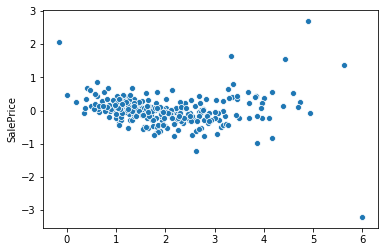

In [140]:
sns.scatterplot(pred_test,(y_test-pred_test))

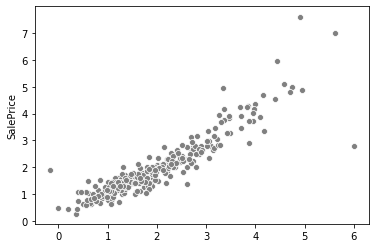

In [116]:
sns.scatterplot(pred_test,y_test,color='grey')

In [119]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test,'Diff':(y_test-pred_test)})

In [120]:
df

,Actual,Predicted,Diff
1292,1.008193,1.288534,-0.280341
1129,1.459520,1.180011,0.279509
262,1.612276,1.929557,-0.317281
599,1.612276,1.705797,-0.093520
224,4.879183,4.943143,-0.063960
...,...,...,...
615,1.424802,1.556156,-0.131354
883,1.160950,0.981817,0.179133
602,2.570476,2.896851,-0.326374
838,1.515067,1.363456,0.151612


In [147]:
print("The RMSE of the model is %.2f" %(np.mean(y_test - pred_test) ** 2))

The RMSE of the model is 0.00


In [150]:
(np.mean(y_test - pred_test) ** 2)

5.2463482275151444e-05

In [155]:
num = (np.mean(y_test - pred_test) ** 2)
num

5.2463482275151444e-05

In [156]:
type(num)

float

In [161]:
num.real*

5.2463482275151444e-05